# Compute lowest possible error rate discriminating 3 gaussians:

In [123]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [141]:
mu1 = np.array([1, 0, 0])
mu2 = np.array([0, 1, 0])
mu3 = np.array([0, 0, 1])

covar = np.eye(3)*0.5
L = np.linalg.cholesky(covar)

## Generate synthetic data:

Sample 100 points of each gaussian

In [142]:
n_samples = 500

X1 = mu1 + np.random.randn(n_samples, 3) @ L.T
X2 = mu2 + np.random.randn(n_samples, 3) @ L.T
X3 = mu3 + np.random.randn(n_samples, 3) @ L.T

X = np.vstack((X1, X2, X3))
Y = np.concatenate((np.zeros(n_samples,), np.ones(n_samples,), np.ones(n_samples,)+1))

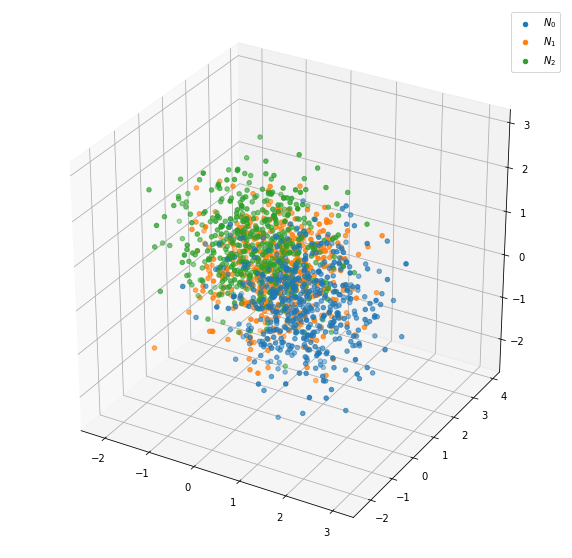

In [143]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(X[Y==i, 0], X[Y==i, 1], X[Y==i, 2], label=r'$N_{}$'.format(i))
    
ax.legend()

plt.show()

Best possible guess is assign each point to the clossest gaussian:

In [144]:
preds = np.argmax(X, axis=1)
acc = np.mean(preds==Y)

print("Best empiric accuracy: {:.2f}".format(100.*acc))

Best empiric accuracy: 74.47


## Compute best accuracy analyticaly

To do this for each Gaussian we integrate it over the region of the space which is closer to it than to other Gaussians. Since our problem is symmetric we can do this just for one case.

To integrate the Gaussian we can use the CDF as follows: 
* First we find the region of the space over which we want to integrate.
* Then we define a change of basis such that the planes delimiting such region are orthogonal.
* We compute the CDF using some approximation already implemented in a scientific computing library like Scipy.

For the Gaussian centered at [0, 0, 1]:

The separating planes are z=x and z=y, which can be represented by the tuple vectors: ([0, 1, 0], [1, 0, 1]) and ([1, 0, 0], [0, 1, 1]) respectively.

In [145]:
A = np.array([[1, 0, -1.], [0, 1, -1.], [1., 1., 1.]])
print("The transformation matrix is A=\n{}".format(A))

The transformation matrix is A=
[[ 1.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  1.  1.]]


In [146]:
print("The separating planes are now defined by:")
print("({}, {})".format(A @ np.array([0, 1, 0]).T, A @ np.array([1, 0, 1]).T))
print("({}, {})".format(A @ np.array([1, 0, 0]).T, A @ np.array([0, 1, 1]).T))

The separating planes are now defined by:
([0. 1. 1.], [ 0. -1.  2.])
([1. 0. 1.], [-1.  0.  2.])


Which are the planes x=0 and y=0 respectively.

Since we are performing a change of variables we have to transform the Gaussian accordingly:

In [147]:
mu1_A = A @ mu1
mu2_A = A @ mu2
mu3_A = A @ mu3

print("The guassians are centered now at:\n")
print(r"A(mu_1)={}".format(mu1_A))
print(r"A(mu_2)={}".format(mu2_A))
print(r"A(mu_3)={}".format(mu3_A))

The guassians are centered now at:

A(mu_1)=[1. 0. 1.]
A(mu_2)=[0. 1. 1.]
A(mu_3)=[-1. -1.  1.]


In [148]:
covarA = A @ covar @ A.T

print("And Covariance matrix A(Sigma)= \n {}".format(covarA))

And Covariance matrix A(Sigma)= 
 [[1.  0.5 0. ]
 [0.5 1.  0. ]
 [0.  0.  1.5]]


In [149]:
max_discr = multivariate_normal.cdf(np.array([0, 0, np.inf]), mean=mu3_A, cov=covarA)

In [150]:
print("The cdf gives us the lowest possible discrimination error: {:.2f}%".format(max_discr*100.))

The cdf gives us the lowest possible discrimination error: 74.52%
